## 5.1 인슐린 수치를 에측하기위해 데이터 셋 나누기

In [117]:
#라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [118]:
df = pd.read_csv('./Data/diabetes.csv')
df.shape

(768, 9)

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
## 학습, 예측 데이터셋 나누기
(df['Insulin']>0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [121]:
train = df[df['Insulin']>0].copy()
train.shape

(394, 9)

In [122]:
test = df[df['Insulin']==0].copy()
test.shape

(374, 9)

### EDA
 - 이상치 제거하기

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

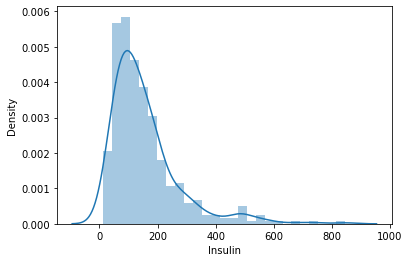

In [123]:
sns.distplot(train['Insulin'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

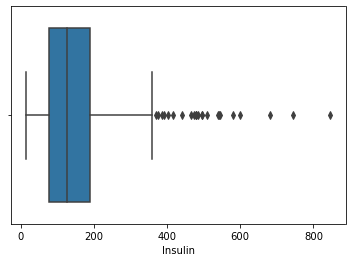

In [124]:
sns.boxplot(train['Insulin'])

In [125]:
desc = train['Insulin'].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [126]:
#이상치 구하기
# IQR = 3IQR - 1IQR
# 이상치  = 3IQR + (1.5 * IQR)

IQR = desc.loc['75%'] - desc.loc['25%']
OUT = desc.loc['75%'] + (IQR *1.5)

In [127]:
#이상치 값이 몇개인지확인
train[train['Insulin']>OUT].shape

(24, 9)

In [128]:
#24개를 제거하면 train세트가 적어지기 때문에 먼저 600이상의 이상치만 제거
train = train[train['Insulin']<600]
train.shape

(390, 9)

In [129]:
# 이상치를 제거할 경우
train = train[train['Insulin']<OUT]
train.shape

(370, 9)

In [130]:
##학습, 예측에 사용할 컬럼
df.columns
feature_names = df.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [131]:
#예측할 값 정하기
label_name = 'Insulin'
label_name

'Insulin'

In [132]:
#학습데이터와 예측 데이터 나누기
X_train = train[feature_names]
X_train.shape

(370, 8)

In [133]:
y_train =train[label_name]
y_train.shape

(370,)

In [134]:
#예측데이터
X_test = test[feature_names]
X_test.shape

(374, 8)

In [135]:
y_test= test[label_name]
y_test.shape

(374,)

#### 머신러닝 알고리즘 가져오기

In [136]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)
model

DecisionTreeRegressor(random_state=42)

In [137]:
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [138]:
#Cross Validation으로 학습세트의 오차를 측정한다.

from sklearn.model_selection import cross_val_predict

y_predict  = cross_val_predict(model, X_train, y_train, cv=5, verbose = 2, n_jobs =-1)
y_predict[:10]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.8s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.8s finished


array([ 25., 182.,  55., 144., 220.,  83., 176., 310.,  90., 120.])

 - cv : 테스트를 몇번 반복할지 
     - cv가 많으면 많을수록 시간이 오래걸리지만 정확도가 높아진다
     
 - verbose : 로그를 표시할지 말지
 

In [139]:
#정답을 정확하게 맞추 개수
(y_predict == y_train).sum()

7

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

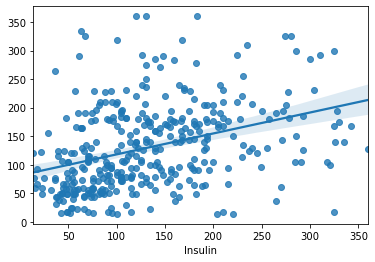

In [140]:
sns.regplot(y_train, y_predict)
#200미만의 값은 예측을 잘 했지만 200 이상의 값들은 실제값과 예측값의 차이가 크다
#기울기로 보면 된다.

In [141]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)
#회귀가 잘 되었는지 측정하는 함수
#1에 가까워야 잘 예측한 것이다.

-0.28551906710833275

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

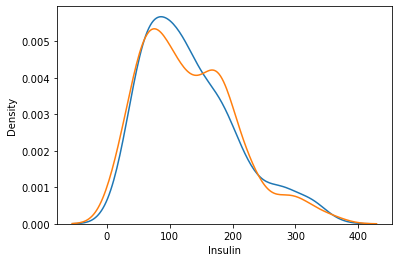

In [142]:
sns.distplot(y_train,hist = False, label ='train')
sns.distplot(y_predict , hist = False,label ='test')

## RandomizedSearchCV로 최적의 파라미트 찾기

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators =[DecisionTreeRegressor(random_state =42),
            RandomForestRegressor(random_state = 42),
            GradientBoostingRegressor(random_state = 42)]

estimators



[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [144]:
results = []
for estimator in estimators :
    result =[]
    result.append(estimator.__class__.__name__)
    results.append(result)
    
pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [145]:
max_depth = np.random.randint(5,30,10)
max_depth

array([20, 12, 17, 17, 22, 18, 26, 28, 29, 18])

In [146]:
max_features = np.random.uniform(0.2,1.0,10)
max_features

array([0.99833051, 0.97467992, 0.61707116, 0.46272286, 0.8330596 ,
       0.44205848, 0.85826854, 0.31284354, 0.34236104, 0.27395552])

In [147]:
from sklearn.model_selection import RandomizedSearchCV

results=[]
for estimator in estimators :
    result =[] 
    max_features = np.random.uniform(0.2,1.0,10)
    max_depth = np.random.randint(5,30,10)
    

    param_distributions = {"max_depth" : max_depth,
                          "max_features" : max_features }
    
    regressor =RandomizedSearchCV(estimator, 
                                 param_distributions,
                                 n_iter = 10,
                                 scoring = None,
                                 cv =5,
                                 verbose =2,
                                 random_state =42)
    
    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.4782009909945142, max_depth=13 ...................
[CV] .... max_features=0.4782009909945142, max_depth=13, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=13 ...................
[CV] .... max_features=0.4782009909945142, max_depth=13, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=13 ...................
[CV] .... max_features=0.4782009909945142, max_depth=13, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=13 ...................
[CV] .... max_features=0.4782009909945142, max_depth=13, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=13 ...................
[CV] .... max_features=0.4782009909945142, max_depth=13, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=24 ...................
[CV] .... max_features=0.4782009909945142, max_depth=24, total=   0.0s
[CV] max_features=0.4782009909945142, max_depth=24 ...................
[CV] .... max_fe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_features=0.9705862973669148, max_depth=13, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=13 ...................
[CV] .... max_features=0.9705862973669148, max_depth=13, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=13 ...................
[CV] .... max_features=0.9705862973669148, max_depth=13, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=13 ...................
[CV] .... max_features=0.9705862973669148, max_depth=13, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=13 ...................
[CV] .... max_features=0.9705862973669148, max_depth=13, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=25 ...................
[CV] .... max_features=0.9705862973669148, max_depth=25, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=25 ...................
[CV] .... max_features=0.9705862973669148, max_depth=25, total=   0.0s
[CV] max_features=0.9705862973669148, max_depth=25 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... max_features=0.24469845476369942, max_depth=13, total=   0.1s
[CV] max_features=0.24469845476369942, max_depth=13 ..................
[CV] ... max_features=0.24469845476369942, max_depth=13, total=   0.1s
[CV] max_features=0.24469845476369942, max_depth=13 ..................
[CV] ... max_features=0.24469845476369942, max_depth=13, total=   0.1s
[CV] max_features=0.24469845476369942, max_depth=13 ..................
[CV] ... max_features=0.24469845476369942, max_depth=13, total=   0.1s
[CV] max_features=0.24469845476369942, max_depth=13 ..................
[CV] ... max_features=0.24469845476369942, max_depth=13, total=   0.2s
[CV] max_features=0.24469845476369942, max_depth=10 ..................
[CV] ... max_features=0.24469845476369942, max_depth=10, total=   0.1s
[CV] max_features=0.24469845476369942, max_depth=10 ..................
[CV] ... max_features=0.24469845476369942, max_depth=10, total=   0.2s
[CV] max_features=0.24469845476369942, max_depth=10 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.6s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] max_features=0.2608664641024279, max_depth=17 ...................
[CV] .... max_features=0.2608664641024279, max_depth=17, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=17 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_features=0.2608664641024279, max_depth=17, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=17 ...................
[CV] .... max_features=0.2608664641024279, max_depth=17, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=17 ...................
[CV] .... max_features=0.2608664641024279, max_depth=17, total=   0.3s
[CV] max_features=0.2608664641024279, max_depth=17 ...................
[CV] .... max_features=0.2608664641024279, max_depth=17, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=9 ....................
[CV] ..... max_features=0.2608664641024279, max_depth=9, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=9 ....................
[CV] ..... max_features=0.2608664641024279, max_depth=9, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=9 ....................
[CV] ..... max_features=0.2608664641024279, max_depth=9, total=   0.1s
[CV] max_features=0.2608664641024279, max_depth=9 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.7s finished


In [148]:
df_cv =pd.DataFrame(results)
df_cv.columns = ["model","params","estimator","score","cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.40129865284424854, 'max_dep...","DecisionTreeRegressor(max_depth=6, max_feature...",0.155152,"{'mean_fit_time': [0.0032160282135009766, 0.00..."
1,RandomForestRegressor,"{'max_features': 0.6025276005176947, 'max_dept...","(DecisionTreeRegressor(max_depth=19, max_featu...",0.337133,"{'mean_fit_time': [0.138014554977417, 0.142623..."
2,GradientBoostingRegressor,"{'max_features': 0.2608664641024279, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.288348,"{'mean_fit_time': [0.14880332946777344, 0.0865..."


In [149]:
#RandomForestRegressor가 score가 가장 높다.
best_estimator = df_cv.loc[1,"estimator"]
best_estimator

RandomForestRegressor(max_depth=19, max_features=0.6025276005176947,
                      random_state=42)

In [150]:
#다시 학습시킨다.
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, max_features=0.6025276005176947,
                      random_state=42)

In [151]:
#cross_validation으로 오차를 측정한다.
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv= 5, verbose = 2, n_jobs =-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


array([ 50.12, 151.05,  93.4 , 146.56, 182.51])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

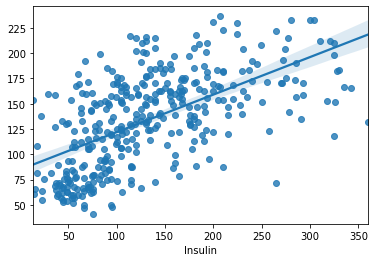

In [152]:
#회귀선에 값들이 가까워졌다.
sns.regplot(y_train,y_predict)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

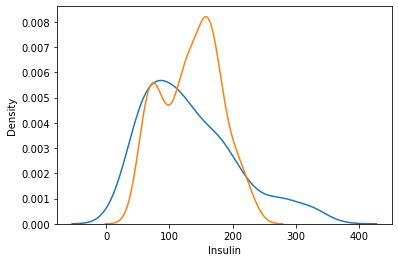

In [153]:
#분포의 차이는 보인다.
sns.distplot(y_train, hist =False, label='train')
sns.distplot(y_predict, hist= False,label="predict")

In [154]:
error= abs(y_train - y_predict)
error.mean()

44.89658252895752

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

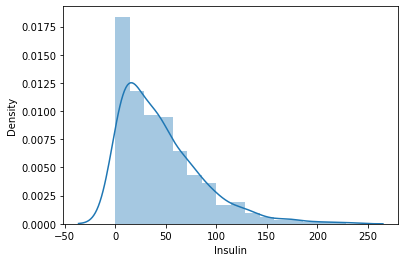

In [155]:
#오류차이가 적게 나는 부분에 데이터가 몰려있는것을 확인 할 수 있다.
sns.distplot(error)

In [156]:
error.describe()

count    370.000000
mean      44.896583
std       39.625061
min        0.010000
25%       13.745000
50%       36.095000
75%       67.102500
max      228.330000
Name: Insulin, dtype: float64

#### MAE = Mean absolutely Error

In [157]:
# 86
# 77 (600이상의 이상치 제거)
# 62 (이상치 제거)
# 44 - RandomSearchCV
error = abs(y_train- y_predict)
error.mean()

44.89658252895752

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

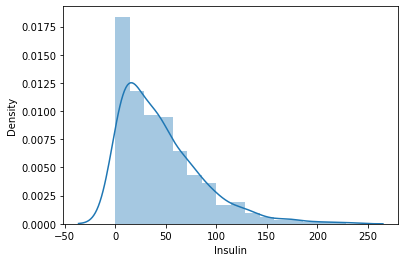

In [158]:
sns.distplot(error)

In [159]:
error.describe()

count    370.000000
mean      44.896583
std       39.625061
min        0.010000
25%       13.745000
50%       36.095000
75%       67.102500
max      228.330000
Name: Insulin, dtype: float64

#### RMSE = Root Mean Squared Error

In [160]:
#RMSE는 표준편차를 구하는 식과 유사하다.
# 126.895
# 114.077 (600이상이 이상치 제거)
# 84.111 (이상치 제거)
# 59.786 (RandomSearchCV)
np.sqrt(((y_train - y_predict)**2).mean())

59.84651184736266

In [161]:
#DecisionTree 시각화

#from sklearn.tree import plot_tree

#plt.figure.Figure(figsize=(20, 20))
#tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

In [162]:
model.feature_importances_

array([0.04858345, 0.44656558, 0.07097731, 0.05588694, 0.16087336,
       0.09607089, 0.11025783, 0.01078464])

<AxesSubplot:>

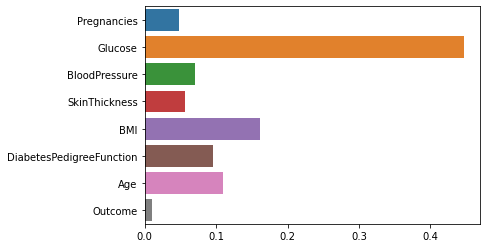

In [163]:
sns.barplot(x= model.feature_importances_, y= feature_names)

#### 예측

In [164]:
y_test = model.predict(X_test)
y_test[:5]

array([168.,  37., 130., 215., 165.])

#### 예측의 결과값 분석

 - 정답값(y_test)가 없기 때문에 y_train의 정보들과 비교해서 잘 예측했는지 확인한다.

In [165]:
train.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [166]:
test['Insulin'] =y_test

In [167]:
test.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,124.906780,80.878263,18.0,64.00,97.5,155.0,335.0
1,138.0,163.724638,83.718835,14.0,96.75,145.0,215.0,328.0


<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

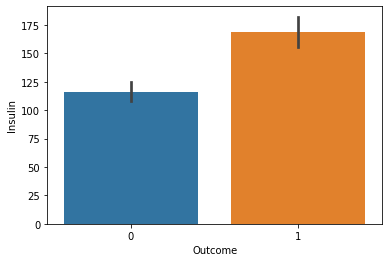

In [168]:
#train데이터 인슐린 평균값을 시각화
sns.barplot(data=train, x='Outcome',y='Insulin')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

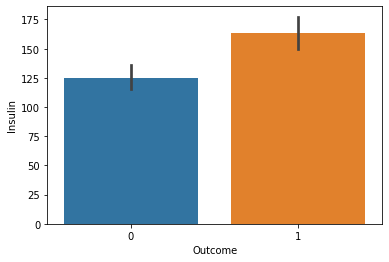

In [169]:
#test데이터 인슐린 평균값 시각화
sns.barplot(data= test, x='Outcome', y='Insulin')

## csv파일로 인슐린 예측 결과 저장하기

In [170]:
df.loc[df['Insulin']==0,'Insulin']

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [171]:
test['Insulin']

0      168.0
1       37.0
2      130.0
5      215.0
7      165.0
       ...  
761    328.0
762     94.0
764    325.0
766     22.0
767     88.0
Name: Insulin, Length: 374, dtype: float64

In [172]:


df.loc[df['Insulin']==0,'Insulin'] =test['Insulin']

In [173]:
df.to_csv("./Data/diabetes_fill_insulin.csv",index=False)

In [174]:
pd.read_csv("./Data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,168.0,33.6,0.627,50,1
1,1,85,66,29,37.0,26.6,0.351,31,0
2,8,183,64,0,130.0,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,325.0,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,22.0,30.1,0.349,47,1
